## load in data from datapoints.txt and store in good structure

In [74]:
import matplotlib.pyplot as plt
import csv

# initializing to store data labeled as 0 and 1
label_0_data = []
label_1_data = []

# Downloading data from "datapoints.txt"
with open('datapoints.txt', newline='') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
        width, height, label = map(float, row)
        if label == 0:
            label_0_data.append({'width': width, 'height': height, 'label': label})        
        elif label == 1:
            label_1_data.append({'width': width, 'height': height, 'label': label})

print(label_0_data)
print(label_1_data)

[{'width': 21.959384499160468, 'height': 31.23956701424158, 'label': 0.0}, {'width': 17.714056417303343, 'height': 31.44170391314962, 'label': 0.0}, {'width': 19.332572350434354, 'height': 32.25325633655492, 'label': 0.0}, {'width': 20.191281253428173, 'height': 35.06966921830237, 'label': 0.0}, {'width': 19.639358214988224, 'height': 34.56117030001663, 'label': 0.0}, {'width': 18.341233265627693, 'height': 31.399261188293124, 'label': 0.0}, {'width': 20.23890182459327, 'height': 32.78945132868386, 'label': 0.0}, {'width': 17.905128921789093, 'height': 28.88813385482529, 'label': 0.0}, {'width': 19.299333494980544, 'height': 30.486337996080024, 'label': 0.0}, {'width': 20.118681851201636, 'height': 31.89116680793916, 'label': 0.0}, {'width': 17.96926166354966, 'height': 32.48406633310577, 'label': 0.0}, {'width': 21.58631807419169, 'height': 30.975094109600928, 'label': 0.0}, {'width': 18.659636883604406, 'height': 33.04492931889734, 'label': 0.0}, {'width': 19.209914415003638, 'height

## load in data from testpoints.txt and store in good structure

In [85]:
import csv


test_list = []

with open('testpoints.txt', newline='') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
        width = float(row[0].split("(")[1])
        height = float(row[1].split("(")[1])
        test_list.append({'width': width, 'height': height})
       

print(test_list)

IndexError: list index out of range

## plotting the points

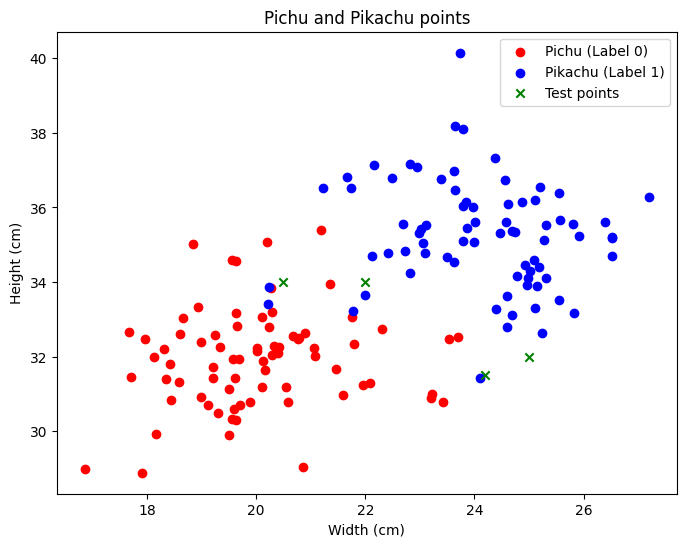

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Creating figure for plotting
plt.figure(figsize=(8, 6))

pichu_x = [point['width'] for point in label_0_data]
pichu_y = [point['height'] for point in label_0_data]
pikachu_x = [point['width'] for point in label_1_data]
pikachu_y = [point['height'] for point in label_1_data]

# Creating a scatter plot with colors based on "labels, "c" specifies every color based on "labels"
plt.scatter(pichu_x, pichu_y, c="red", marker="o", label="Pichu (Label 0)")
plt.scatter(pikachu_x, pikachu_y, c="blue", marker="o", label="Pikachu (Label 1)")
plt.scatter([x[0] for x in test_list], [x[1] for x in test_list], c="green", marker="x", label="Test points")

plt.xlabel("Width (cm)")
plt.ylabel("Height (cm)")

plt.legend()

plt.title("Pichu and Pikachu points")

plt.show()


## Calculating distance between points

In [55]:
import numpy as np

# Calculating the Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt((point1['width'] - point2['width'])** 2 + (point1['height'] - point2['height']) ** 2)

# Converting tuples
label_0_data = [{'width': point['width'], 'height': point['height'], 'label': point['label']} for point in label_0_data]
label_1_data = [{'width': point['width'], 'height': point['height'], 'label': point['label']} for point in label_1_data]

all_data = label_0_data + label_1_data + test_list

num_data_points = len(all_data)
num_test_points = len(test_list)

# Creating array to store distances
Distances = np.zeros((num_data_points, num_test_points))

# calculating distance between all data points
for i in range(num_data_points):
    for j in range (num_test_points):
        Distances[i][j] = euclidean_distance(all_data[i], test_list[j])
        
for i in range(num_test_points):
    for j in range(num_test_points):
        print(f"distance between point {i} and point {j}: {Distances[i][j]}")




TypeError: tuple indices must be integers or slices, not str

## deciding which pokemon based on closest point

In [9]:
import numpy as np

for i in range(num_points):
    for j in range(num_points):
        Distances[i][j] = euclidean_distance(all_data[i], all_data[j])

closest_labels = []

# Determining if Pichu or Pikachu is the closest
for i in range(num_points):
    closest_label = None
    min_distance = float('inf')  
    for j in range(num_points):
        if i != j:  
            distance = Distances[i][j]
            if distance < min_distance:
                min_distance = distance
                if j < len(label_0_data):
                    closest_label = "Pichu"
                elif j < len(label_0_data) + len(label_1_data):
                    closest_label = "Pikachu"
    closest_labels.append(closest_label)

for i in range(len(label_0_data) + len(label_1_data), num_points):
    print(f"Sample with (width, height): {test_list[i - num_points]} classified as {closest_labels[i - num_points]}")

Sample with (width, height): (25, 32) classified as Pikachu
Sample with (width, height): (24.2, 31.5) classified as Pikachu
Sample with (width, height): (22, 34) classified as Pikachu
Sample with (width, height): (20.5, 34) classified as Pichu


## Uppgift 1

In [220]:
# Allowing the user to input a test point
while True:
    try:
        width = float(input("Enter the test point width: "))
        height = float(input("Enter the height of the test point: "))
        test_point = (width, height)
        break
    except ValueError:
        print("Invalid input")

# Calculating the closest label
min_distance = float('inf')
closest_label = None
for i in range(num_points):
    distance = euclidean_distance(test_point, all_data[i])
    if distance < min_distance:
        min_distance = distance
        if i < len(label_0_data):
            closest_label = "Pichu"
        elif i < len(label_0_data) + len(label_1_data):
            closest_label = "Pikachu"

print(f"Test point with (width, height): {test_point} is classified as {closest_label}") # This code was from chat gpt


Test point with (width, height): (25.0, 42.0) is classified as Pikachu


## Uppgift 2

In [15]:
import numpy as np
from operator import itemgetter 

def euclidean_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return np.sqrt((x2-x1) ** 2 + (y2 - y1)**2)

test_points = [(25, 32), (24.2, 31.5), (22, 34), (20.5, 34)]

# looping through each testingpoint and calculating distance between all points and the all_data points
for test_point in test_points:
    distances = [(i, euclidean_distance(test_point, point)) for i, point in enumerate(all_data)]

# sorting distances
closest_indices = [index for index, _ in sorted (distances, key=itemgetter(1))[:10]]

# getting 10 closest points
closest_points = [all_data[i] for i in closest_indices]
 
classified_classes = max(set(closest_classes), key=closest_classes.count)

print(f"Test point (width, height): {test_point} - closest points:")
for i, point in enumerate(closest_points, start=1):
    print(f"{i}. {point}")


Test point (width, height): (20.5, 34) - closest points:
1. (20.5, 34)
2. [20.276898330625336, 33.84658247356705]
3. [20.240420339246214, 33.87654102727224]
4. [20.216002852334192, 33.41610156154373]
5. [20.282109030336354, 33.18796105898338]
6. [21.35018601896744, 33.94708664610186]
7. [20.098954730848863, 33.067467402673685]
8. [19.639358214988224, 34.56117030001663]
9. [20.191281253428173, 35.06966921830237]
10. [19.55060327163345, 34.602756266320824]


## Uppgift 3

In [235]:
import random

random.shuffle(label_1_data)
random.shuffle(label_0_data)

num_training_samples = 100
num_test_samples = 50

# Splitting the shuffled pikachu data into training and test sets, // means integer division
pikachu_training = label_1_data[: num_training_samples // 2]
pikachu_test = label_1_data[num_training_samples // 2:num_training_samples // 2 + num_test_samples // 2]

# splitting shuffled pichu data
pichu_training = label_0_data[: num_training_samples // 2]
pichu_test = label_0_data[num_training_samples // 2:num_training_samples // 2 + num_test_samples // 2]

training_data = pikachu_training + pichu_training
test_data = pikachu_test + pichu_test

random.shuffle(training_data)
random.shuffle(test_data)

# Creating tagged training_data and test_data
pikachu_training_label = [(item, "Pikachu") for item in pikachu_training]
pichu_training_label = [(item, "Pichu") for item in pichu_training]
training_data_label = pikachu_training_label + pichu_training_label

pikachu_test_label = [(item, "Pikachu") for item in pikachu_test]
pichu_test_label = [(item, "Pichu") for item in pichu_test]
test_data_label = pikachu_test_label + pichu_test_label

random.shuffle(training_data_label)
random.shuffle(test_data_label)

print("Training Data:")
for item, label in training_data_label:
    print(f"{label}: {item}")

print("\nTest Data:")
for item, label in test_data_label:
    print(f"{label}: {item}")



Training Data:
Pikachu: [25.23472228644244, 32.641361593924174]
Pichu: [18.659636883604406, 33.04492931889734]
Pikachu: [22.980962976720388, 35.3191819848619]
Pichu: [17.714056417303343, 31.44170391314962]
Pichu: [21.069573240979203, 32.21936612110862]
Pichu: [18.989418138097026, 30.90556767082746]
Pikachu: [23.868174335146136, 35.449698119416254]
Pichu: [18.424438779822488, 31.79940219340467]
Pichu: [19.510846016895872, 29.897476657136767]
Pichu: [18.583516818010633, 31.317010181098944]
Pikachu: [21.735098682375444, 36.51127780882874]
Pikachu: [23.79257560586339, 38.10372825362463]
Pikachu: [21.989953947825015, 33.64590281447322]
Pichu: [19.213188999276543, 31.71415755285442]
Pikachu: [26.525412887538252, 35.2192205449002]
Pikachu: [26.5173046073707, 35.18452932633369]
Pichu: [21.35018601896744, 33.94708664610186]
Pichu: [19.689909518113225, 31.931042667213433]
Pichu: [20.008781128403864, 32.15292152986537]
Pichu: [19.499062316347583, 31.139578977011656]
Pichu: [20.1569063412357, 31.6

## Uppgift 4

In [2]:
import math
import matplotlib.pyplot as plt

accuracy_val = []
k_val = []

def calculate_distance(point1, point2):
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)


# going through different values for k(1-8)
for k in range(1, 8):
    TP = 0
    FP = 0
    FN = 0
    TN = 0

    # going through test data and calculating distances, sort them, counting and choosing maj class, and also uppdate tp, fp, fn, tn on the real labels
    for test_point, actual_label in test_data_label:
        distances = [(calculate_distance(test_point, train_point), train_label) for train_point, train_label in training_data_label]

        sorted_distances = sorted(distances, key=lambda x: x[0])
        k_nearest = sorted_distances[:k]

        pikachu_count = sum(1 for _, label in k_nearest if label == "Pikachu")
        pichu_count = sum(1 for _, label in k_nearest if label == "Pichu")

        predicted_label = "Pikachu" if pikachu_count > pichu_count else "Pichu"

        if predicted_label == "Pikachu" and actual_label == "Pikachu":
            TP += 1
        elif predicted_label == "Pikachu" and actual_label == "Pichu":
            FP += 1
        elif predicted_label == "Pichu" and actual_label == "Pikachu":
            FN += 1
        else:
            TN += 1
    
    # calculating accuracy
    Total = len(test_data_label)
    accuracy = (TP + TN) / Total

    # adding k_val and accuracy for plotting
    accuracy_val.append(accuracy)
    k_val.append(k)

plt.plot(k_val, accuracy_val, color= "blue")
plt.title("Accuracy vs K value")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show

NameError: name 'test_data_label' is not defined